## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  64.418935  1357.651924  0.730415  10.747800  1.499940
1  21.494399   716.313006  0.597738  10.527717  1.493911
2  71.439953   864.997225  0.037905   6.055330  0.390034
3  20.713887  1344.965159  0.414797   2.327611  1.572526
4  12.300454   856.742455  0.302365   2.379148  1.272624


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9205196	total: 58.1ms	remaining: 58.1s
1:	learn: 0.9113141	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9039977	total: 59.2ms	remaining: 19.7s
3:	learn: 0.8934233	total: 59.7ms	remaining: 14.9s
4:	learn: 0.8864657	total: 60.2ms	remaining: 12s
5:	learn: 0.8797363	total: 60.7ms	remaining: 10s
6:	learn: 0.8722471	total: 61.3ms	remaining: 8.7s
7:	learn: 0.8623855	total: 61.8ms	remaining: 7.66s
8:	learn: 0.8554771	total: 62.2ms	remaining: 6.85s
9:	learn: 0.8487344	total: 63ms	remaining: 6.23s
10:	learn: 0.8401736	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8312564	total: 63.9ms	remaining: 5.26s
12:	learn: 0.8250489	total: 64.4ms	remaining: 4.89s
13:	learn: 0.8178080	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8099912	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8014490	total: 65.7ms	remaining: 4.04s
16:	learn: 0.7932197	total: 66.2ms	remaining: 3.83s
17:	learn: 0.7857183	total: 66.6ms	remaining: 3.63s
18:	learn: 0.7790666	total: 67.1ms	remaining: 3.46s


110:	learn: 0.3969326	total: 108ms	remaining: 861ms
111:	learn: 0.3944939	total: 108ms	remaining: 856ms
112:	learn: 0.3920376	total: 108ms	remaining: 851ms
113:	learn: 0.3901016	total: 109ms	remaining: 845ms
114:	learn: 0.3877085	total: 109ms	remaining: 840ms
115:	learn: 0.3856525	total: 110ms	remaining: 835ms
116:	learn: 0.3831410	total: 110ms	remaining: 829ms
117:	learn: 0.3813035	total: 110ms	remaining: 824ms
118:	learn: 0.3797333	total: 111ms	remaining: 819ms
119:	learn: 0.3781885	total: 111ms	remaining: 815ms
120:	learn: 0.3755489	total: 112ms	remaining: 811ms
121:	learn: 0.3736410	total: 112ms	remaining: 807ms
122:	learn: 0.3713203	total: 113ms	remaining: 802ms
123:	learn: 0.3694022	total: 113ms	remaining: 798ms
124:	learn: 0.3666368	total: 113ms	remaining: 794ms
125:	learn: 0.3650148	total: 114ms	remaining: 790ms
126:	learn: 0.3633343	total: 114ms	remaining: 787ms
127:	learn: 0.3614022	total: 115ms	remaining: 782ms
128:	learn: 0.3593843	total: 115ms	remaining: 779ms
129:	learn: 

293:	learn: 0.1696012	total: 186ms	remaining: 446ms
294:	learn: 0.1690545	total: 186ms	remaining: 445ms
295:	learn: 0.1684804	total: 187ms	remaining: 444ms
296:	learn: 0.1679705	total: 187ms	remaining: 442ms
297:	learn: 0.1674834	total: 187ms	remaining: 441ms
298:	learn: 0.1665636	total: 188ms	remaining: 440ms
299:	learn: 0.1660249	total: 188ms	remaining: 439ms
300:	learn: 0.1654908	total: 189ms	remaining: 438ms
301:	learn: 0.1649745	total: 189ms	remaining: 437ms
302:	learn: 0.1645254	total: 190ms	remaining: 436ms
303:	learn: 0.1637918	total: 190ms	remaining: 435ms
304:	learn: 0.1632106	total: 191ms	remaining: 434ms
305:	learn: 0.1626357	total: 191ms	remaining: 433ms
306:	learn: 0.1618732	total: 191ms	remaining: 432ms
307:	learn: 0.1611240	total: 192ms	remaining: 431ms
308:	learn: 0.1606344	total: 192ms	remaining: 430ms
309:	learn: 0.1596332	total: 193ms	remaining: 429ms
310:	learn: 0.1590826	total: 193ms	remaining: 428ms
311:	learn: 0.1585806	total: 193ms	remaining: 427ms
312:	learn: 

535:	learn: 0.0737373	total: 289ms	remaining: 251ms
536:	learn: 0.0736327	total: 290ms	remaining: 250ms
537:	learn: 0.0732167	total: 291ms	remaining: 249ms
538:	learn: 0.0730762	total: 291ms	remaining: 249ms
539:	learn: 0.0728719	total: 292ms	remaining: 248ms
540:	learn: 0.0724688	total: 292ms	remaining: 248ms
541:	learn: 0.0722147	total: 292ms	remaining: 247ms
542:	learn: 0.0720537	total: 293ms	remaining: 246ms
543:	learn: 0.0718952	total: 293ms	remaining: 246ms
544:	learn: 0.0717078	total: 294ms	remaining: 245ms
545:	learn: 0.0715716	total: 294ms	remaining: 244ms
546:	learn: 0.0714156	total: 294ms	remaining: 244ms
547:	learn: 0.0712650	total: 295ms	remaining: 243ms
548:	learn: 0.0711471	total: 295ms	remaining: 242ms
549:	learn: 0.0709987	total: 296ms	remaining: 242ms
550:	learn: 0.0708168	total: 296ms	remaining: 241ms
551:	learn: 0.0706424	total: 296ms	remaining: 240ms
552:	learn: 0.0705440	total: 297ms	remaining: 240ms
553:	learn: 0.0704476	total: 297ms	remaining: 239ms
554:	learn: 

722:	learn: 0.0493793	total: 367ms	remaining: 141ms
723:	learn: 0.0493076	total: 368ms	remaining: 140ms
724:	learn: 0.0492906	total: 368ms	remaining: 140ms
725:	learn: 0.0492738	total: 369ms	remaining: 139ms
726:	learn: 0.0491493	total: 369ms	remaining: 139ms
727:	learn: 0.0490607	total: 370ms	remaining: 138ms
728:	learn: 0.0489735	total: 370ms	remaining: 138ms
729:	learn: 0.0487557	total: 371ms	remaining: 137ms
730:	learn: 0.0486058	total: 371ms	remaining: 137ms
731:	learn: 0.0485893	total: 372ms	remaining: 136ms
732:	learn: 0.0485729	total: 372ms	remaining: 136ms
733:	learn: 0.0485568	total: 373ms	remaining: 135ms
734:	learn: 0.0484261	total: 373ms	remaining: 135ms
735:	learn: 0.0484102	total: 373ms	remaining: 134ms
736:	learn: 0.0483944	total: 374ms	remaining: 133ms
737:	learn: 0.0483094	total: 374ms	remaining: 133ms
738:	learn: 0.0480977	total: 375ms	remaining: 132ms
739:	learn: 0.0479513	total: 375ms	remaining: 132ms
740:	learn: 0.0479357	total: 376ms	remaining: 131ms
741:	learn: 

957:	learn: 0.0277997	total: 471ms	remaining: 20.7ms
958:	learn: 0.0277241	total: 472ms	remaining: 20.2ms
959:	learn: 0.0276503	total: 472ms	remaining: 19.7ms
960:	learn: 0.0275351	total: 473ms	remaining: 19.2ms
961:	learn: 0.0274345	total: 473ms	remaining: 18.7ms
962:	learn: 0.0273411	total: 474ms	remaining: 18.2ms
963:	learn: 0.0272696	total: 474ms	remaining: 17.7ms
964:	learn: 0.0271998	total: 475ms	remaining: 17.2ms
965:	learn: 0.0271190	total: 475ms	remaining: 16.7ms
966:	learn: 0.0270499	total: 475ms	remaining: 16.2ms
967:	learn: 0.0269827	total: 476ms	remaining: 15.7ms
968:	learn: 0.0268727	total: 476ms	remaining: 15.2ms
969:	learn: 0.0268052	total: 477ms	remaining: 14.7ms
970:	learn: 0.0267488	total: 477ms	remaining: 14.3ms
971:	learn: 0.0266839	total: 478ms	remaining: 13.8ms
972:	learn: 0.0266137	total: 478ms	remaining: 13.3ms
973:	learn: 0.0265446	total: 479ms	remaining: 12.8ms
974:	learn: 0.0264798	total: 479ms	remaining: 12.3ms
975:	learn: 0.0263918	total: 480ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

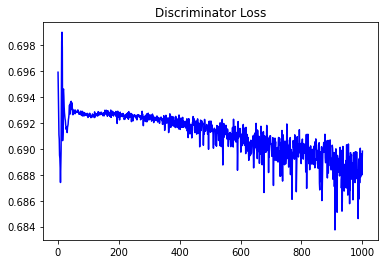

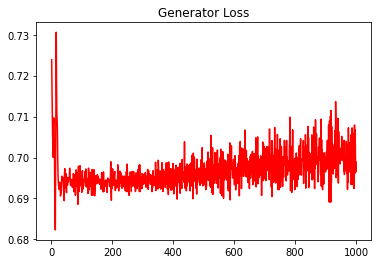

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5789705704553743


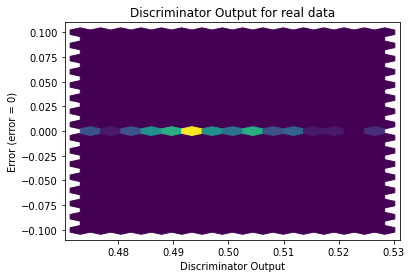

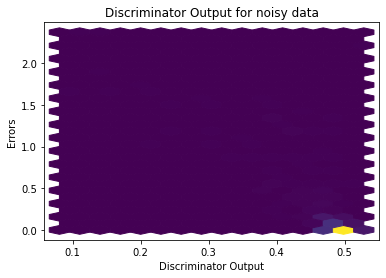

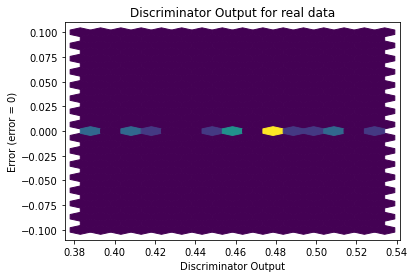

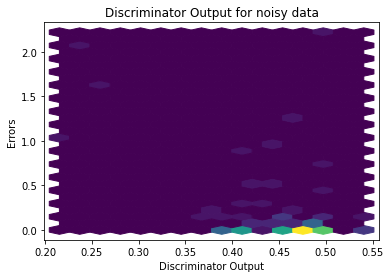

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


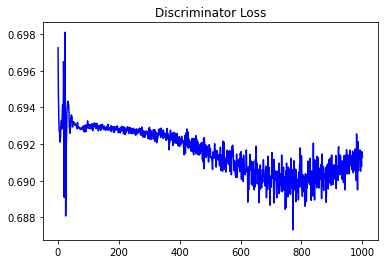

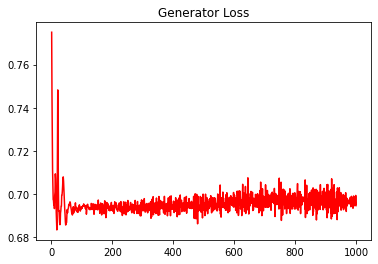

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.6242095498665048


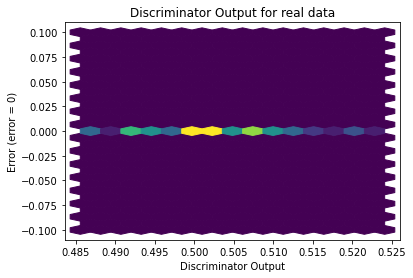

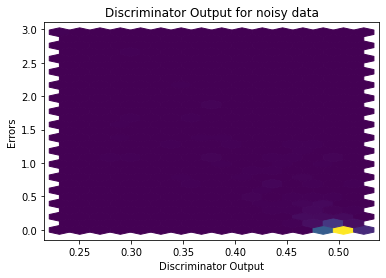

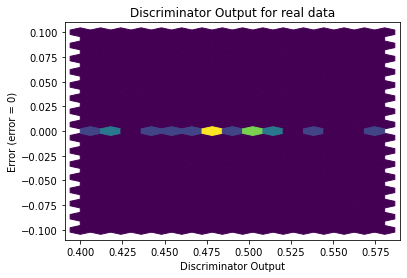

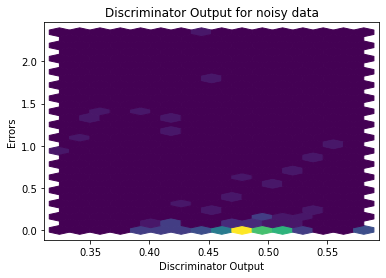

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2978]], requires_grad=True)
